In [161]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Convert comments to glove word embedding vectors

In [2]:
glove = {}
with open('../../GloVe-1.2/glove.840B.300d.txt', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        try:
            key = line.split()[0]
            value = np.array(line.split()[1:], np.float32)
            if value.shape[0] != 300:
                print("BAD LEN  - ", i, line[0:30])
            else:
                glove[key] = value
        except:
            print("BAD READ - ", i, line[0:30])
f.close()

BAD READ -  52343 . . . -0.1573 -0.29517 0.30453
BAD READ -  128261 at name@domain.com 0.0061218 0
BAD LEN  -  142318   0.20785 0.2703 0.93632 -0.50
BAD READ -  151102 . . . . . -0.23773 -0.82788 0.
BAD READ -  200668 to name@domain.com 0.33865 0.1
BAD READ -  209833 . . 0.035974 -0.024421 0.71402
BAD READ -  220779 . . . . 0.033459 -0.085658 0.2
BAD READ -  253461 email name@domain.com 0.33529 
BAD LEN  -  263028  0.39511 0.37458 0.24418 -0.1
BAD READ -  365745 or name@domain.com 0.48374 0.4
BAD LEN  -  484922        0.13211 0.19999 0.37907
BAD READ -  532048 contact name@domain.com 0.0164
BAD LEN  -  538123    -0.38024 0.61431 0.81146 -0
BAD LEN  -  557081     -0.0033421 0.4899 1.119 -1
BAD READ -  717302 Email name@domain.com 0.37344 
BAD READ -  994818 on name@domain.com 0.037295 -0
BAD LEN  -  1032148      0.14608 0.31513 0.50599 -
BAD LEN  -  1122163       -0.36288 -0.075749 0.354
BAD READ -  1123331 At Killerseats.com -0.13854 -0
BAD READ -  1148409 by name@domain.com 0.6882 -0

In [119]:
joblib.dump(glove, '/home/jeremy/GloVe-1.2/glove.840B.300d.dict.pckl')

['/home/jeremy/GloVe-1.2/glove.840B.300d.dict.pckl']

In [3]:
glove['walnuts']

array([ 0.17342  ,  0.42841  , -0.12137  ,  0.12503  , -0.77557  ,
        0.4157   , -1.1029   ,  0.31284  , -0.47173  , -0.25112  ,
       -0.47382  ,  0.15856  , -0.064695 ,  0.35716  , -0.1094   ,
       -0.48151  ,  0.40838  ,  0.30213  , -0.19368  ,  0.35321  ,
        0.1967   , -0.27406  , -0.10537  ,  0.3105   , -0.49084  ,
       -0.59019  , -0.28256  ,  0.067447 ,  0.068688 , -1.4757   ,
       -0.064048 ,  0.52788  ,  0.37621  ,  0.43549  ,  0.42615  ,
        0.32507  , -0.16607  , -0.38979  , -0.68838  ,  1.142    ,
       -0.44051  , -0.10226  , -0.081264 ,  0.13646  ,  0.029865 ,
        0.93744  ,  0.12327  ,  0.26315  ,  0.34169  ,  0.29988  ,
       -0.3654   ,  0.12366  ,  0.26209  , -0.091759 ,  0.5753   ,
       -1.2094   , -0.076121 ,  0.53914  ,  0.067694 ,  0.020417 ,
        0.7704   , -0.36545  , -0.19416  ,  0.1207   ,  0.0026695,
        0.19433  ,  0.24337  ,  0.4475   , -0.37692  ,  1.0467   ,
       -0.18357  ,  0.45931  ,  0.29174  ,  0.16686  , -0.1033

In [4]:
train_clean = joblib.load('data/train_clean.pckl')
test_clean = joblib.load('data/test_clean.pckl')

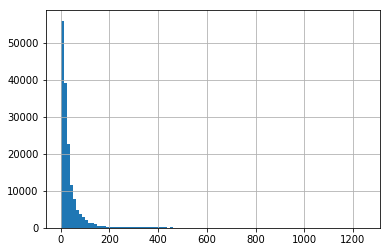

In [5]:
train_clean['clean_text_list'].apply(lambda x: len(x)).hist(bins=100)

In [9]:
train_clean['clean_text_list'].apply(lambda x: len(x)).describe()

count    159571.000000
mean         36.006618
std          56.102106
min           0.000000
25%           9.000000
50%          19.000000
75%          39.000000
max        1250.000000
Name: clean_text_list, dtype: float64

In [8]:
train_clean['clean_text_list'].apply(lambda x: len(x)).quantile([.9, .95, .98, .99])

0.90     79.0
0.95    121.0
0.98    216.0
0.99    313.0
Name: clean_text_list, dtype: float64

In [110]:
def get_mean_glove(sentence, impute):
    
    # impute array of 0's for words not found in corpus
    g = [ glove.get(w, impute) for w in sentence ]
    
    # impute a single array of 0's for comments of length 0
    if not g:
        g = [np.zeros(300)]
        
    return np.asarray(g).reshape(-1, 300).mean(axis=0)

In [112]:
impute_means = np.asarray([get_mean_glove(s, np.zeros(300)) for s in train_clean['clean_text_list']]).mean(axis=0)

In [166]:
X = np.asarray([get_mean_glove(s, impute_means) for s in train_clean['clean_text_list']], dtype=np.float32)

In [204]:
X_test = np.asarray([get_mean_glove(s, impute_means) for s in test_clean['clean_text_list']], dtype=np.float32)

In [210]:
torch.LongTensor(np.zeros(10))


 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
[torch.LongTensor of size 10]

In [207]:
X_test.shape[0]

153164

In [203]:
joblib.dump(X, 'data/glove_mean_embeddings.pckl' )

['data/glove_mean_embeddings.pckl']

In [206]:
joblib.dump(X_test, 'data/glove_mean_embeddings_test.pckl' )

['data/glove_mean_embeddings_test.pckl']

### Using prior splits, create training and validation data loaders

In [169]:
splits = joblib.load('pytorch/splits.pckl')
train_ids = [ i for i, v in enumerate(splits) if v < 10 ]
valid_ids = [ i for i, v in enumerate(splits) if v >= 10 ]
len(train_ids), len(valid_ids), len(train_ids)+len(valid_ids)

(99971, 59600, 159571)

In [170]:
Xtrain = X[train_ids,]
ytrain = train_clean.loc[train_ids, 'toxic']

Xvalid = X[valid_ids,]
yvalid = train_clean.loc[valid_ids, 'toxic']

In [171]:
import torch
import torch.utils.data
import torch.optim as optim
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import roc_curve, auc

In [172]:
# create training data loader
Xtrain_tensor = torch.from_numpy(Xtrain)
ytrain_tensor = torch.LongTensor([int(x) for x in ytrain])
train_set = torch.utils.data.TensorDataset(Xtrain_tensor, ytrain_tensor)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=3)

In [173]:
# create validation data loader
Xvalid_tensor = torch.from_numpy(Xvalid)
yvalid_tensor = torch.LongTensor([int(x) for x in yvalid])
valid_set = torch.utils.data.TensorDataset(Xvalid_tensor, yvalid_tensor)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=64, shuffle=True, num_workers=3)

### Define simple NN with single hidden layer and dropout

In [175]:
class GloveClassifier(nn.Module):  # inheriting from nn.Module!

    def __init__(self, num_labels, dims):
        super(GloveClassifier, self).__init__()
        self.linear1 = nn.Linear(dims, 64)
        self.dropout = nn.Dropout()
        self.linear2 = nn.Linear(64, num_labels)

    def forward(self, x):
        x = self.linear1(x)
        x = self.dropout(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)

In [177]:
# weight obs by inverse class occurence
w = train_clean['toxic'].value_counts(normalize=True).iloc[::-1]
C = Variable(torch.FloatTensor([w[1], w[0]]))
C

Variable containing:
 0.0958
 0.9042
[torch.FloatTensor of size 2]

In [ ]:
model = GloveClassifier(2, 300)
#model.cuda()

loss_function = nn.NLLLoss(weight=C)
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=.001)

running_loss = 0
test_accuracy = []

In [201]:
for epoch in range(60, 100):

    for i, data in enumerate(train_loader):

        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)

        optimizer.zero_grad()

        log_probs = model(inputs)

        loss = loss_function(log_probs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.data[0]

        if ((i+1)% 200 == 0):
            print('%d loss: %.6f' % (i, running_loss / 200))
            running_loss = 0

    pred = []
    act = []

    for i, data in enumerate(valid_loader):

        inputs, labels = data
        outputs = model(Variable(inputs)) #.cuda())
        pred += list(outputs[:,1].data)
        act += list(labels)

    fpr, tpr, thresholds = roc_curve(act, pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    roc_auc 

    print(epoch, ' - Test AUC: %0.6f  %%' % roc_auc)
    test_accuracy.append(roc_auc)

199 loss: 0.504378
399 loss: 0.276739
599 loss: 0.283508
799 loss: 0.280860
999 loss: 0.273912
1199 loss: 0.268961
1399 loss: 0.272428
60  - Test AUC: 0.957471  %
199 loss: 0.500585
399 loss: 0.283824
599 loss: 0.268303
799 loss: 0.263317
999 loss: 0.282607
1199 loss: 0.271667
1399 loss: 0.279752
61  - Test AUC: 0.957561  %
199 loss: 0.516005
399 loss: 0.263092
599 loss: 0.290673
799 loss: 0.268041
999 loss: 0.298620
1199 loss: 0.263016
1399 loss: 0.281916
62  - Test AUC: 0.957891  %
199 loss: 0.497028
399 loss: 0.280404
599 loss: 0.284680
799 loss: 0.280113
999 loss: 0.265832
1199 loss: 0.268431
1399 loss: 0.271846
63  - Test AUC: 0.957646  %
199 loss: 0.497941
399 loss: 0.266746
599 loss: 0.285773
799 loss: 0.280356
999 loss: 0.277978
1199 loss: 0.269839
1399 loss: 0.277526
64  - Test AUC: 0.957861  %
199 loss: 0.511294
399 loss: 0.263588
599 loss: 0.283348
799 loss: 0.276045
999 loss: 0.274908
1199 loss: 0.269158
1399 loss: 0.287070
65  - Test AUC: 0.957710  %
199 loss: 0.505695
399

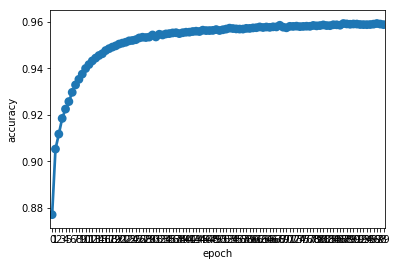

In [202]:
df = pd.DataFrame(data = {'accuracy' :  test_accuracy, 
                          'epoch':  range(len(test_accuracy))})

sns.pointplot(x='epoch', y='accuracy', data=df)

In [ ]:
pred = []

Xtest = joblib.load('../data/glove_mean_embeddings_test.pckl')
Xtest_tensor = torch.from_numpy(Xtest)
test_set = torch.utils.data.TensorDataset(Xtest_tensor, torch.zeros(len(Xtest)))
test_loader = torch.utils.data.DataLoader(test_set, 
    batch_size=100, shuffle=True, num_workers=1)

for data, l in test_loader:
    inputs = data
    outputs = netmodel(Variable(inputs).cuda())
    pred += list(outputs[:,1].data)

test_clean = joblib.load('../data/test_clean.pckl')

scores = pd.concat([test_clean['id'], pd.Series(pred).apply(lambda x: np.exp(x))], axis=1) 
scores.columns=['id', args.target]
scores.to_csv(outfile, index=False)
return None

In [211]:
scores = model(Variable(torch.from_numpy(X_test)))

In [212]:
scores

Variable containing:
 -6.0575  -0.0023
 -0.2490  -1.5124
 -0.0111  -4.5027
        ⋮         
 -0.1093  -2.2676
 -0.0475  -3.0704
 -2.3882  -0.0963
[torch.FloatTensor of size 153164x2]

In [217]:
pd.DataFrame(X_test).tail()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
153159,-0.239131,0.086813,-0.374401,0.004080,-0.122726,0.256395,-0.026060,-0.440183,-0.010516,2.237900,...,-0.148079,0.008841,-0.112323,-0.104593,0.082093,0.053799,-0.113155,-0.047068,0.100132,0.168129
153160,-0.018004,0.115340,-0.139041,0.081994,0.067978,0.034809,0.113983,0.065407,0.013996,1.800163,...,-0.004889,0.052900,0.044046,-0.035669,0.038218,-0.176424,0.056709,-0.111344,-0.185500,-0.039604
153161,-0.091347,0.018573,-0.110105,0.014345,0.079016,-0.068000,-0.021574,0.015599,-0.063619,1.713953,...,-0.127277,0.121574,-0.110550,-0.140547,0.166343,-0.140938,-0.218039,-0.035746,0.238082,0.036859
153162,-0.018123,0.097923,-0.109054,0.042866,0.198605,-0.012639,0.010624,0.072936,-0.060098,1.745123,...,-0.153311,0.027266,-0.194491,-0.065747,0.087041,-0.059262,-0.079903,-0.070492,-0.006794,0.110591
153163,-0.247709,0.100545,-0.187481,-0.121590,-0.023746,0.148450,0.092791,-0.149952,-0.080544,2.021887,...,-0.176057,0.060877,-0.169323,-0.056754,0.254278,0.068550,-0.062881,0.065956,-0.075787,0.227117


In [218]:


class GloveClassifier(nn.Module):  # inheriting from nn.Module!

    def __init__(self, num_labels, dims):
        super(GloveClassifier, self).__init__()
        self.linear1 = nn.Linear(dims, 64)
        self.dropout = nn.Dropout()
        self.linear2 = nn.Linear(64, num_labels)

    def forward(self, x):
        x = self.linear1(x)
        x = self.dropout(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)


In [219]:
model = GloveClassifier(2, 300)

In [224]:
Xtest_tensor = torch.from_numpy(X_test)

In [230]:
def create_submission(netmodel, outfile, target):
    outputs = netmodel(Variable(Xtest_tensor))
    pred = list(outputs[:,1].data)
    scores = pd.concat([test_clean['id'], pd.Series(pred).apply(lambda x: np.exp(x))], axis=1) 
    scores.columns=['id', target]
    scores.to_csv(outfile, index=False)
    return None

In [234]:
for target in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    model.load_state_dict(torch.load('pytorch/glove_mean/'+target+'_model_state'))
    create_submission(model, 'pytorch/glove_mean/'+target+'_test_scores.csv', target)